### PROJET

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Data exportation and cleaning

In [3]:
df = pd.read_csv("biodeg.csv",header=None,sep=";")
df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,0,6,1,3.573,2.242,1,8.088,0,0,NRB
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,3,0,3.787,3.083,3,9.278,0,0,NRB
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,...,4,13,0,3.848,2.576,5,9.537,1,0,NRB
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,1,16,0,5.808,2.055,8,11.055,0,1,NRB


In [4]:
col_names=[
"1) SpMax_L: Leading eigenvalue from Laplace matrix",
"2) J_Dz(e): Balaban-like index from Barysz matrix weighted by Sanderson electronegativity",
"3) nHM: Number of heavy atoms",
"4) F01[N-N]: Frequency of N-N at topological distance 1",
"5) F04[C-N]: Frequency of C-N at topological distance 4",
'6) NssssC: Number of atoms of type ssssC',
'7) nCb-: Number of substituted benzene C(sp2)',
'8) C%: Percentage of C atoms',
'9) nCp: Number of terminal primary C(sp3)',
'10) nO: Number of oxygen atoms',
'11) F03[C-N]: Frequency of C-N at topological distance 3',
'12) SdssC: Sum of dssC E-states',
'13) HyWi_B(m): Hyper-Wiener-like index (log function) from Burden matrix weighted by mass',
'14) LOC: Lopping centric index',
'15) SM6_L: Spectral moment of order 6 from Laplace matrix',
'16) F03[C-O]: Frequency of C - O at topological distance 3',
'17) Me: Mean atomic Sanderson electronegativity (scaled on Carbon atom)',
'18) Mi: Mean first ionization potential (scaled on Carbon atom)',
'19) nN-N: Number of N hydrazines',
'20) nArNO2: Number of nitro groups (aromatic)',
'21) nCRX3: Number of CRX3',
'22) SpPosA_B(p): Normalized spectral positive sum from Burden matrix weighted by polarizability',
'23) nCIR: Number of circuits',
'24) B01[C-Br]: Presence/absence of C - Br at topological distance 1',
'25) B03[C-Cl]: Presence/absence of C - Cl at topological distance 3',
'26) N-073: Ar2NH / Ar3N / Ar2N-Al / R..N..R',
'27) SpMax_A: Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index)',
'28) Psi_i_1d: Intrinsic state pseudoconnectivity index - type 1d',
'29) B04[C-Br]: Presence/absence of C - Br at topological distance 4',
'30) SdO: Sum of dO E-states',
'31) TI2_L: Second Mohar index from Laplace matrix',
'32) nCrt: Number of ring tertiary C(sp3)',
'33) C-026: R--CX--R',
'34) F02[C-N]: Frequency of C - N at topological distance 2',
'35) nHDon: Number of donor atoms for H-bonds (N and O)',
'36) SpMax_B(m): Leading eigenvalue from Burden matrix weighted by mass',
'37) Psi_i_A: Intrinsic state pseudoconnectivity index - type S average',
'38) nN: Number of Nitrogen atoms',
'39) SM6_B(m): Spectral moment of order 6 from Burden matrix weighted by mass',
'40) nArCOOR: Number of esters (aromatic)',
'41) nX: Number of halogen atoms',
'42) experimental class: ready biodegradable (RB) and not ready biodegradable (NRB)']


In [5]:
#Reducing column's names
col_acr=[]
for a in col_names:
    col_acr.append(re.findall('(?<=\) )(.*?)(?=\:)',a))
col_acr

[['SpMax_L'],
 ['J_Dz(e)'],
 ['nHM'],
 ['F01[N-N]'],
 ['F04[C-N]'],
 ['NssssC'],
 ['nCb-'],
 ['C%'],
 ['nCp'],
 ['nO'],
 ['F03[C-N]'],
 ['SdssC'],
 ['HyWi_B(m)'],
 ['LOC'],
 ['SM6_L'],
 ['F03[C-O]'],
 ['Me'],
 ['Mi'],
 ['nN-N'],
 ['nArNO2'],
 ['nCRX3'],
 ['SpPosA_B(p)'],
 ['nCIR'],
 ['B01[C-Br]'],
 ['B03[C-Cl]'],
 ['N-073'],
 ['SpMax_A'],
 ['Psi_i_1d'],
 ['B04[C-Br]'],
 ['SdO'],
 ['TI2_L'],
 ['nCrt'],
 ['C-026'],
 ['F02[C-N]'],
 ['nHDon'],
 ['SpMax_B(m)'],
 ['Psi_i_A'],
 ['nN'],
 ['SM6_B(m)'],
 ['nArCOOR'],
 ['nX'],
 ['experimental class']]

In [6]:
new_col_acr=[]
for a in col_acr:
    for e in a:
        new_col_acr.append(e)
new_col_acr     

['SpMax_L',
 'J_Dz(e)',
 'nHM',
 'F01[N-N]',
 'F04[C-N]',
 'NssssC',
 'nCb-',
 'C%',
 'nCp',
 'nO',
 'F03[C-N]',
 'SdssC',
 'HyWi_B(m)',
 'LOC',
 'SM6_L',
 'F03[C-O]',
 'Me',
 'Mi',
 'nN-N',
 'nArNO2',
 'nCRX3',
 'SpPosA_B(p)',
 'nCIR',
 'B01[C-Br]',
 'B03[C-Cl]',
 'N-073',
 'SpMax_A',
 'Psi_i_1d',
 'B04[C-Br]',
 'SdO',
 'TI2_L',
 'nCrt',
 'C-026',
 'F02[C-N]',
 'nHDon',
 'SpMax_B(m)',
 'Psi_i_A',
 'nN',
 'SM6_B(m)',
 'nArCOOR',
 'nX',
 'experimental class']

In [7]:
df.rename(columns=dict(zip(np.arange(0,42,1),new_col_acr)),inplace=True)

In [8]:
pd.set_option('display.max_columns',df.shape[1])
df

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,1,0.374,3.233,0.832,10.681,2,0.982,1.144,0,0,0,1.232,1,0,0,0,2.394,-0.007,0,11.254,1.055,2,0,6,1,3.573,2.242,1,8.088,0,0,NRB
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,9,-5.256,4.319,2.346,11.029,21,1.043,1.140,0,0,0,1.178,1,0,0,0,2.462,0.000,0,71.167,3.396,0,0,3,0,3.787,3.083,3,9.278,0,0,NRB
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,14,-0.391,4.435,1.073,11.072,9,1.016,1.123,0,1,0,1.261,3,0,0,0,2.314,0.000,0,33.540,6.465,0,4,13,0,3.848,2.576,5,9.537,1,0,NRB
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,44,0.000,4.902,0.257,11.817,0,1.007,1.093,0,0,0,1.410,147,0,1,2,2.622,0.000,0,0.000,1.535,0,1,16,0,5.808,2.055,8,11.055,0,1,NRB


Get infos from data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SpMax_L             1055 non-null   float64
 1   J_Dz(e)             1055 non-null   float64
 2   nHM                 1055 non-null   int64  
 3   F01[N-N]            1055 non-null   int64  
 4   F04[C-N]            1055 non-null   int64  
 5   NssssC              1055 non-null   int64  
 6   nCb-                1055 non-null   int64  
 7   C%                  1055 non-null   float64
 8   nCp                 1055 non-null   int64  
 9   nO                  1055 non-null   int64  
 10  F03[C-N]            1055 non-null   int64  
 11  SdssC               1055 non-null   float64
 12  HyWi_B(m)           1055 non-null   float64
 13  LOC                 1055 non-null   float64
 14  SM6_L               1055 non-null   float64
 15  F03[C-O]            1055 non-null   int64  
 16  Me    

In [10]:
df.describe()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,1.436967,-0.197129,3.476844,1.350716,9.937381,3.630332,1.013302,1.131106,0.008531,0.073934,0.029384,1.238727,1.405687,0.039810,0.147867,0.031280,2.215641,-0.001206,0.026540,8.780510,2.668344,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,3.116577,0.769662,0.584150,0.786166,0.928678,4.457243,0.046494,0.030143,0.101802,0.317475,0.217997,0.096466,4.788542,0.195606,0.355137,0.199544,0.226131,0.158928,0.160812,11.895889,2.096607,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.256000,1.544000,0.000000,4.174000,0.000000,0.957000,1.022000,0.000000,0.000000,0.000000,0.863000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.099000,0.000000,0.000000,0.444000,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,0.000000,-0.191000,3.105000,0.875000,9.533000,0.000000,0.983000,1.116000,0.000000,0.000000,0.000000,1.182000,0.000000,0.000000,0.000000,0.000000,2.101000,-0.008000,0.000000,0.000000,1.446500,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,0.000000,0.000000,3.442000,1.187000,10.039000,2.000000,1.003000,1.130000,0.000000,0.000000,0.000000,1.243000,1.000000,0.000000,0.000000,0.000000,2.247000,0.000000,0.000000,0.000000,2.052000,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,2.000000,0.000000,3.825500,1.705000,10.514500,6.000000,1.029000,1.143000,0.000000,0.000000,0.000000,1.296000,2.000000,0.000000,0.000000,0.000000,2.358000,0.005000,0.000000,12.465000,3.146000,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,44.000000,4.722000,5.701000,4.491000,12.609000,40.000000,1.311000,1.377000,2.000000,3.000000,3.000000,1.641000,147.000000,1.000000,1.000000,3.000000,2.859000,1.073000,1.000000,71.167000,17.537000,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000


# Visualisation

[]

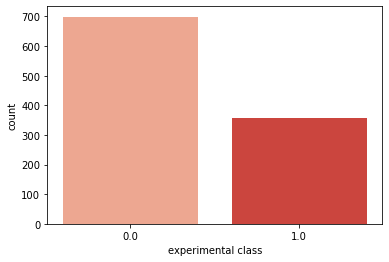

In [97]:
ax3=sns.barplot(x="experimental class",y="count",orient="v",data=df.groupby("experimental class").count()["SpMax_L"].to_frame().reset_index().rename(columns={"SpMax_L":"count"})
               ,palette="Reds")
ax3.plot()

In [94]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()
enc.fit(df[["experimental class"]])
df[["experimental class"]] = enc.transform(df[["experimental class"]])

<AxesSubplot:>

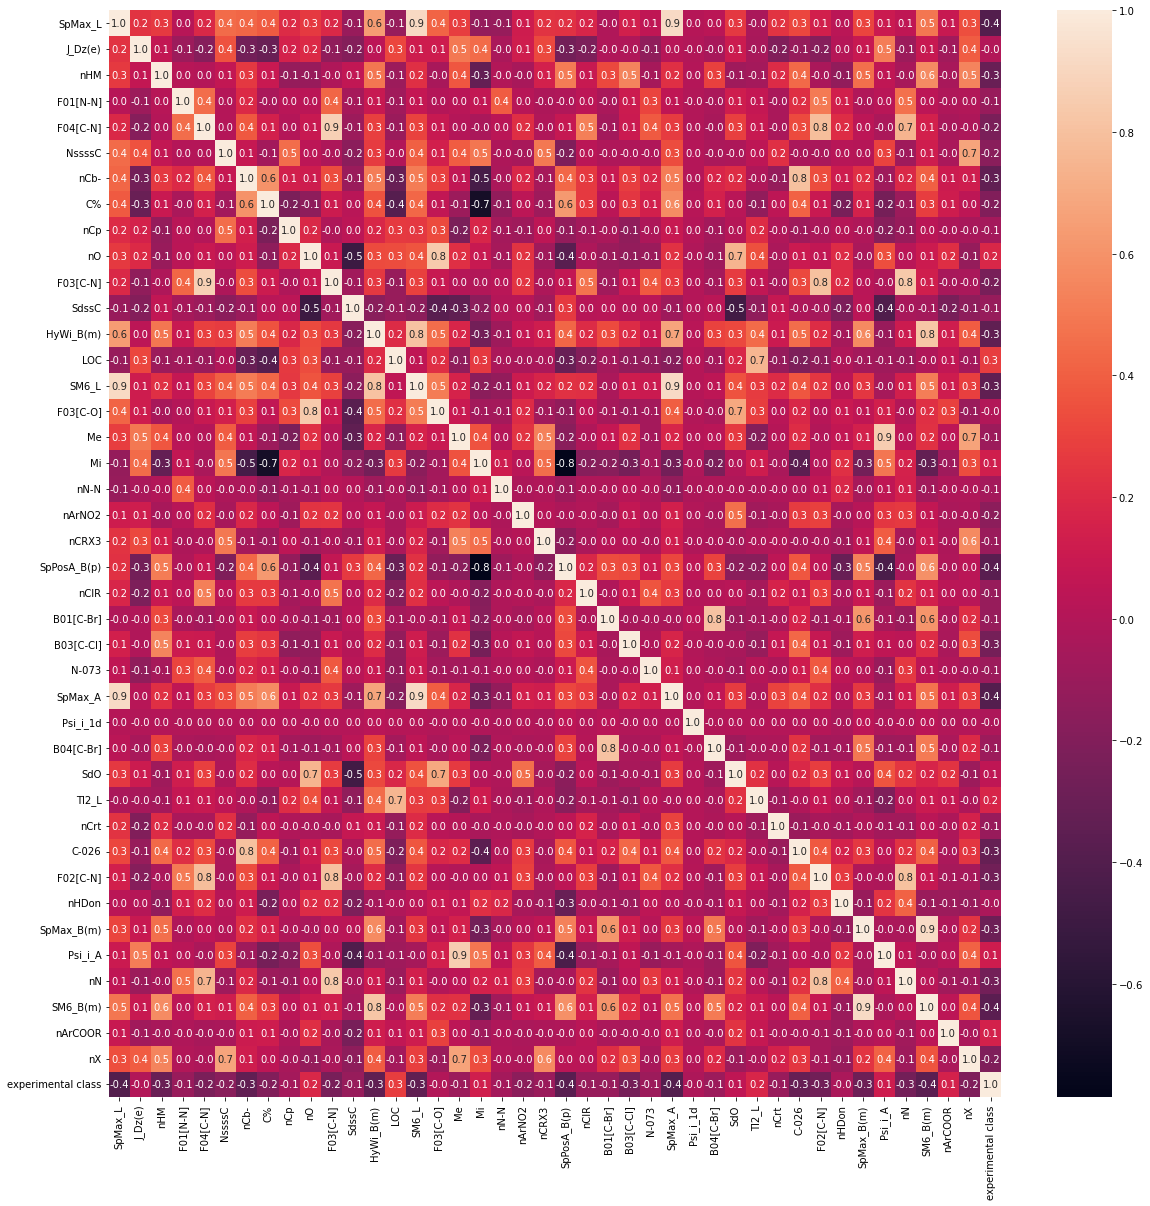

In [96]:

fig, ax = plt.subplots(figsize=(20,20))     
sns.heatmap(df.corr(), annot=True, ax=ax,fmt='.1f')

C:\Users\paulr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


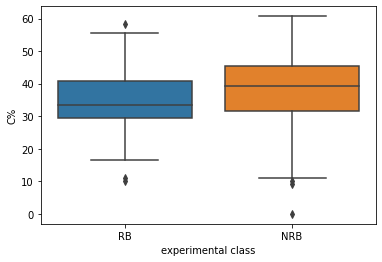

In [11]:
sns.boxplot(df["experimental class"],df['C%'])
plt.show()

C:\Users\paulr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


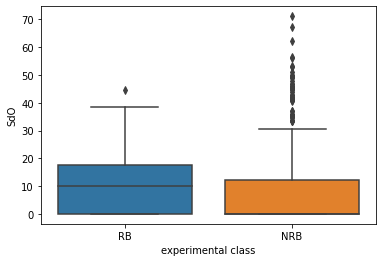

In [12]:
sns.boxplot(df["experimental class"],df['SdO'])
plt.show()

C:\Users\paulr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


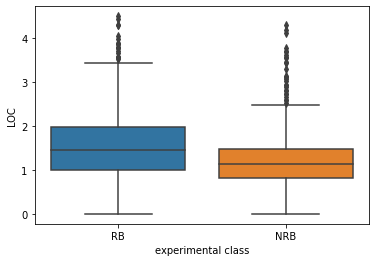

In [13]:
sns.boxplot(df["experimental class"],df['LOC'])
plt.show()

C:\Users\paulr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


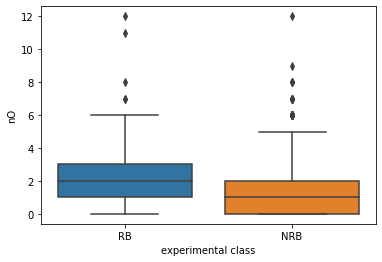

In [14]:
sns.boxplot(df["experimental class"],df['nO'])
plt.show()

# Data preprocessing

Splitting data into train and test split

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('experimental class',axis=1),df['experimental class'], test_size=0.2, random_state=42)


Scaling the data

In [86]:

from sklearn import preprocessing

scaler=preprocessing.StandardScaler().fit(X_train)
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)



In [90]:
enc = preprocessing.OrdinalEncoder()


AttributeError: 'Series' object has no attribute 'reshape'

# Training, testing and compare models

### Support vector machine classifier

In [17]:
from sklearn import svm

#Fitting and testing the model
cl_svm=svm.SVC()
cl_svm.fit(X_train_scale,y_train)

#Training set accuracy
print(cl_svm.score(X_train_scale,y_train))
#Testing set accuracy
print(cl_svm.score(X_test_scale,y_test))

0.9028436018957346
0.8815165876777251


In [18]:
from sklearn.model_selection import GridSearchCV

param_svc={'kernel':['linear','rbf','poly','sigmoid'],'coef0':[0.01,0.1,0.3,0.5],'C':[1,100,300,500],'gamma':('auto','scale'),'degree':[1,3,5,7]}

In [19]:
#GrisSearch function in order to selecting the model's best parameters easily

def EasyGrid(param,model,X,y,score='accuracy',cv=5,verb=3):
    grid = GridSearchCV(model,param,scoring=score,cv=cv,verbose=verb).fit(X,y)
    print("Best params are :",grid.best_params_)
    print("Best estimators are:",grid.best_estimator_)
    print("Best score is:",grid.best_score_)


In [16]:
EasyGrid(param_svc,cl_svm,X_train_scale,y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
[CV 1/5] END C=1, coef0=0.01, degree=1, gamma=auto, kernel=linear;, score=0.846 total time=   0.0s
[CV 2/5] END C=1, coef0=0.01, degree=1, gamma=auto, kernel=linear;, score=0.864 total time=   0.0s
[CV 3/5] END C=1, coef0=0.01, degree=1, gamma=auto, kernel=linear;, score=0.905 total time=   0.0s
[CV 4/5] END C=1, coef0=0.01, degree=1, gamma=auto, kernel=linear;, score=0.834 total time=   0.0s
[CV 5/5] END C=1, coef0=0.01, degree=1, gamma=auto, kernel=linear;, score=0.851 total time=   0.0s
[CV 1/5] END C=1, coef0=0.01, degree=1, gamma=auto, kernel=rbf;, score=0.870 total time=   0.0s
[CV 2/5] END C=1, coef0=0.01, degree=1, gamma=auto, kernel=rbf;, score=0.882 total time=   0.0s
[CV 3/5] END C=1, coef0=0.01, degree=1, gamma=auto, kernel=rbf;, score=0.882 total time=   0.0s
[CV 4/5] END C=1, coef0=0.01, degree=1, gamma=auto, kernel=rbf;, score=0.858 total time=   0.0s
[CV 5/5] END C=1, coef0=0.01, degree=1, gamma=auto, kerne

In [20]:
#Same model but with optimized parameters
cl_svm=svm.SVC(kernel='rbf',C=1,coef0=0.01,degree=1,gamma='auto')
cl_svm.fit(X_train_scale,y_train)

print(cl_svm.score(X_train_scale,y_train))
print(cl_svm.score(X_test_scale,y_test))

0.9028436018957346
0.8815165876777251


Plotting confusion matrix

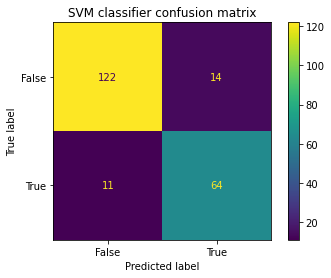

In [21]:
from sklearn import metrics

actual = y_test
predicted = cl_svm.predict(X_test_scale)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title("SVM classifier confusion matrix")
plt.show()

###  k-nearest neighbors classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

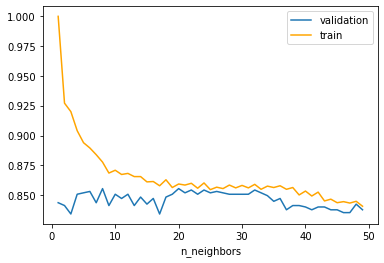

In [23]:
model=KNeighborsClassifier()
k=np.arange(1,50)
train_scores,val_scores=validation_curve(model,X_train_scale,y_train,param_name='n_neighbors',param_range=k,cv=5)
plt.plot(k,val_scores.mean(axis=1),label='validation')
plt.plot(k,train_scores.mean(axis=1),c='orange',label='train')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

In [24]:
cl_knn= KNeighborsClassifier(n_neighbors=20)
cl_knn.fit(X_train_scale,y_train)

print(cl_knn.score(X_train_scale,y_train))
print(cl_knn.score(X_test_scale,y_test))

0.8649289099526066
0.8483412322274881


### Decision tree classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

cl_dt= DecisionTreeClassifier()
cl_dt.fit(X_train_scale,y_train)

print(cl_dt.score(X_train_scale,y_train))
print(cl_dt.score(X_test_scale,y_test))

1.0
0.8199052132701422


In [56]:
param_dt={'criterion':['gini', 'entropy'],'splitter':['best', 'random'],'max_depth':np.arange(3,50,3)}
EasyGrid(param_dt,cl_dt, X_train_scale,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END criterion=gini, max_depth=3, splitter=best;, score=0.746 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, splitter=best;, score=0.763 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, splitter=best;, score=0.822 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, splitter=best;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, splitter=best;, score=0.792 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, splitter=random;, score=0.722 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, splitter=random;, score=0.722 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, splitter=random;, score=0.811 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, splitter=random;, score=0.775 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, splitter=random;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth

In [26]:
cl_dt= DecisionTreeClassifier(criterion='entropy', max_depth=27, splitter='random')
cl_dt.fit(X_train_scale,y_train)

print(cl_dt.score(X_train_scale,y_train))
print(cl_dt.score(X_test_scale,y_test))

1.0
0.8578199052132701


Results are worst than default parameters, and we can see a huge overfitting of the model

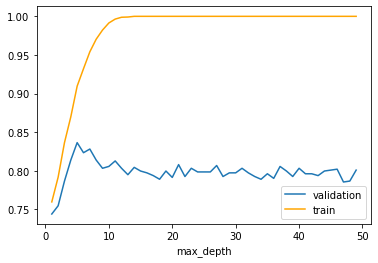

In [27]:
model=DecisionTreeClassifier()
k=np.arange(1,50)
train_scores,val_scores=validation_curve(model,X_train_scale,y_train,param_name='max_depth',param_range=k,cv=5)
plt.plot(k,val_scores.mean(axis=1),label='validation')
plt.plot(k,train_scores.mean(axis=1),c='orange',label='train')
plt.xlabel('max_depth')
plt.legend()
plt.show()

In [28]:
cl_dt= DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random')
cl_dt.fit(X_train_scale,y_train)

print(cl_dt.score(X_train_scale,y_train))
print(cl_dt.score(X_test_scale,y_test))

0.8293838862559242
0.8293838862559242


Way much better, better score at test set and no more overfitting

### Decision tree classifier with Adaboosting

In [30]:
param_ada={ "base_estimator__max_depth": [5,15,30,60,100],
            "base_estimator__criterion": ['gini', 'entropy'],
            'base_estimator__splitter':['best', 'random'],
            "n_estimators": [1,10,30,80,100,150],
            'learning_rate':[0.01,0.1,1,5]
    
}
EasyGrid(param_ada,cl_ada,X_train_scale,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV 1/5] END base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__splitter=best, learning_rate=0.01, n_estimators=1;, score=0.828 total time=   0.0s
[CV 2/5] END base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__splitter=best, learning_rate=0.01, n_estimators=1;, score=0.787 total time=   0.0s
[CV 3/5] END base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__splitter=best, learning_rate=0.01, n_estimators=1;, score=0.870 total time=   0.0s
[CV 4/5] END base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__splitter=best, learning_rate=0.01, n_estimators=1;, score=0.858 total time=   0.0s
[CV 5/5] END base_estimator__criterion=gini, base_estimator__max_depth=5, base_estimator__splitter=best, learning_rate=0.01, n_estimators=1;, score=0.827 total time=   0.0s
[CV 1/5] END base_estimator__criterion=gini, base_estimator__max_depth=

In [30]:
from sklearn.ensemble import AdaBoostClassifier


cl_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=5),n_estimators=30,learning_rate=0.01)
cl_ada.fit(X_train_scale,y_train)

print(cl_ada.score(X_train_scale,y_train))
print(cl_ada.score(X_test_scale,y_test))

0.9834123222748815
0.8578199052132701


Not bad, we again have overfitting

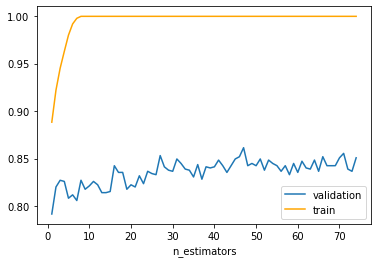

In [31]:
model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=5))

k=np.arange(1,75)

train_scores,val_scores=validation_curve(model,X_train_scale,y_train,param_name='n_estimators',param_range=k,cv=5)
plt.plot(k,val_scores.mean(axis=1),label='validation')
plt.plot(k,train_scores.mean(axis=1),c='orange',label='train')
plt.xlabel('n_estimators')
plt.legend()
plt.show()

We can see that overfitting is still here

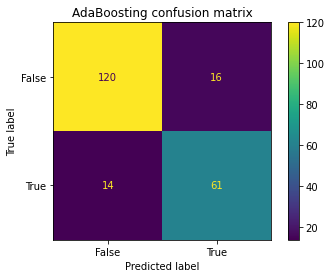

In [32]:
actual = y_test
predicted = cl_ada.predict(X_test_scale)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title("AdaBoosting confusion matrix")
plt.show()

### Random forest classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier


cl_rf= RandomForestClassifier()
cl_rf.fit(X_train_scale,y_train)

print(cl_rf.score(X_train_scale,y_train))
print(cl_rf.score(X_test_scale,y_test))

1.0
0.8862559241706162


In [69]:

param_rf={'n_estimators': [10,20,30,60,80,100,150],'criterion':['gini', 'entropy'],'max_depth':[None,10,15,20,25,30,50,100]}
EasyGrid(param_rf,cl_rf, X_train_scale,y_train)


Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV 1/5] END criterion=gini, max_depth=None, n_estimators=10;, score=0.840 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, n_estimators=10;, score=0.846 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, n_estimators=10;, score=0.888 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, n_estimators=10;, score=0.840 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, n_estimators=10;, score=0.839 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, n_estimators=20;, score=0.828 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, n_estimators=20;, score=0.858 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, n_estimators=20;, score=0.882 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, n_estimators=20;, score=0.876 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, n_estimators=20;, score=0.863 total time=   0.

In [34]:

cl_rf=RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=2,
                       min_samples_split=5)
cl_rf.fit(X_train_scale,y_train)

print(cl_rf.score(X_train_scale,y_train))
print(cl_rf.score(X_test_scale,y_test))

0.9845971563981043
0.9052132701421801


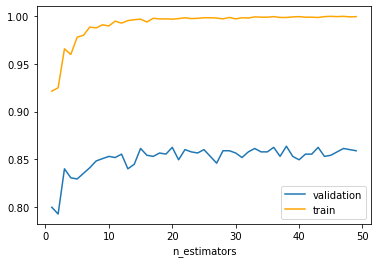

In [35]:
model=RandomForestClassifier()

k=np.arange(1,50)

train_scores,val_scores=validation_curve(model,X_train_scale,y_train,param_name='n_estimators',param_range=k,cv=5)
plt.plot(k,val_scores.mean(axis=1),label='validation')
plt.plot(k,train_scores.mean(axis=1),c='orange',label='train')
plt.xlabel('n_estimators')
plt.legend()
plt.show()

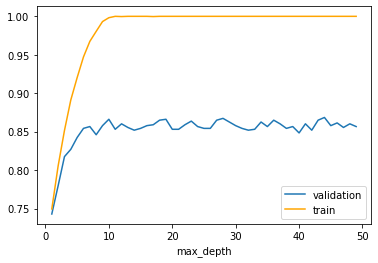

In [36]:
model=RandomForestClassifier()

k=np.arange(1,50)

train_scores,val_scores=validation_curve(model,X_train_scale,y_train,param_name='max_depth',param_range=k,cv=5)
plt.plot(k,val_scores.mean(axis=1),label='validation')
plt.plot(k,train_scores.mean(axis=1),c='orange',label='train')
plt.xlabel('max_depth')
plt.legend()
plt.show()

Again, we have overfitting, and default parameters are the best

## Model Selection

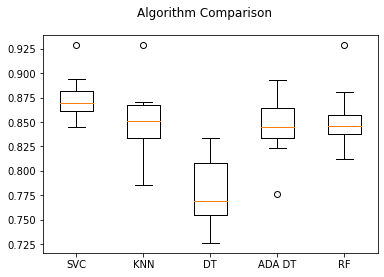

In [42]:
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB



# prepare models
models = []
models.append(('SVC', cl_svm))
models.append(('KNN', cl_knn))
models.append(('DT', cl_dt))
models.append(('ADA DT', cl_ada))
models.append(('RF', cl_rf))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:

 cv_results = model_selection.cross_val_score(model,X_train_scale,y_train, cv=10, scoring=scoring)
 results.append(cv_results)
 names.append(name)


fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Support Vector Machine classifier seems to be the best and the more regular model

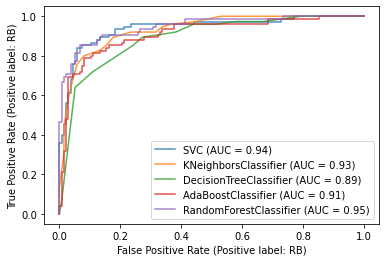

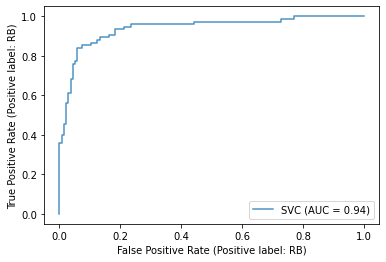

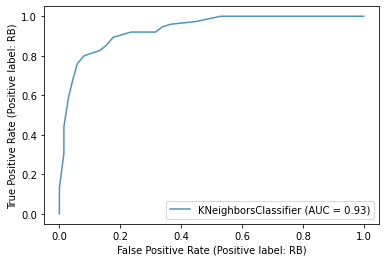

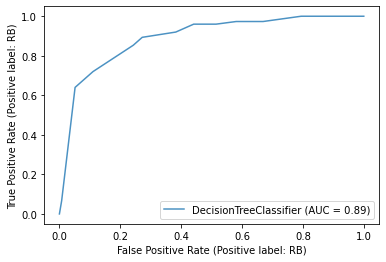

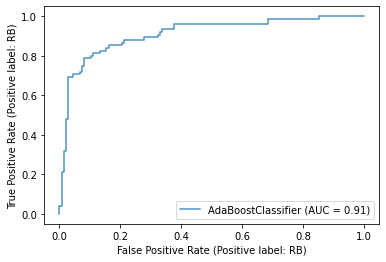

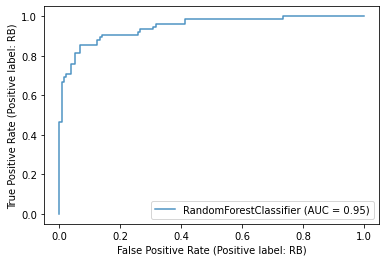

In [96]:
from sklearn.metrics import RocCurveDisplay



ax = plt.gca()

for names,model in models:
    
    RocCurveDisplay.from_estimator(model,X_test_scale,y_test, alpha=0.8).plot(ax=ax, alpha=0.8)   
    
plt.show()

SVC have here the best ROC curve so it confirms his selection.

### Conclusion

The best model seems to be the Support Vector Machine classifier so that will be the one we will choose.

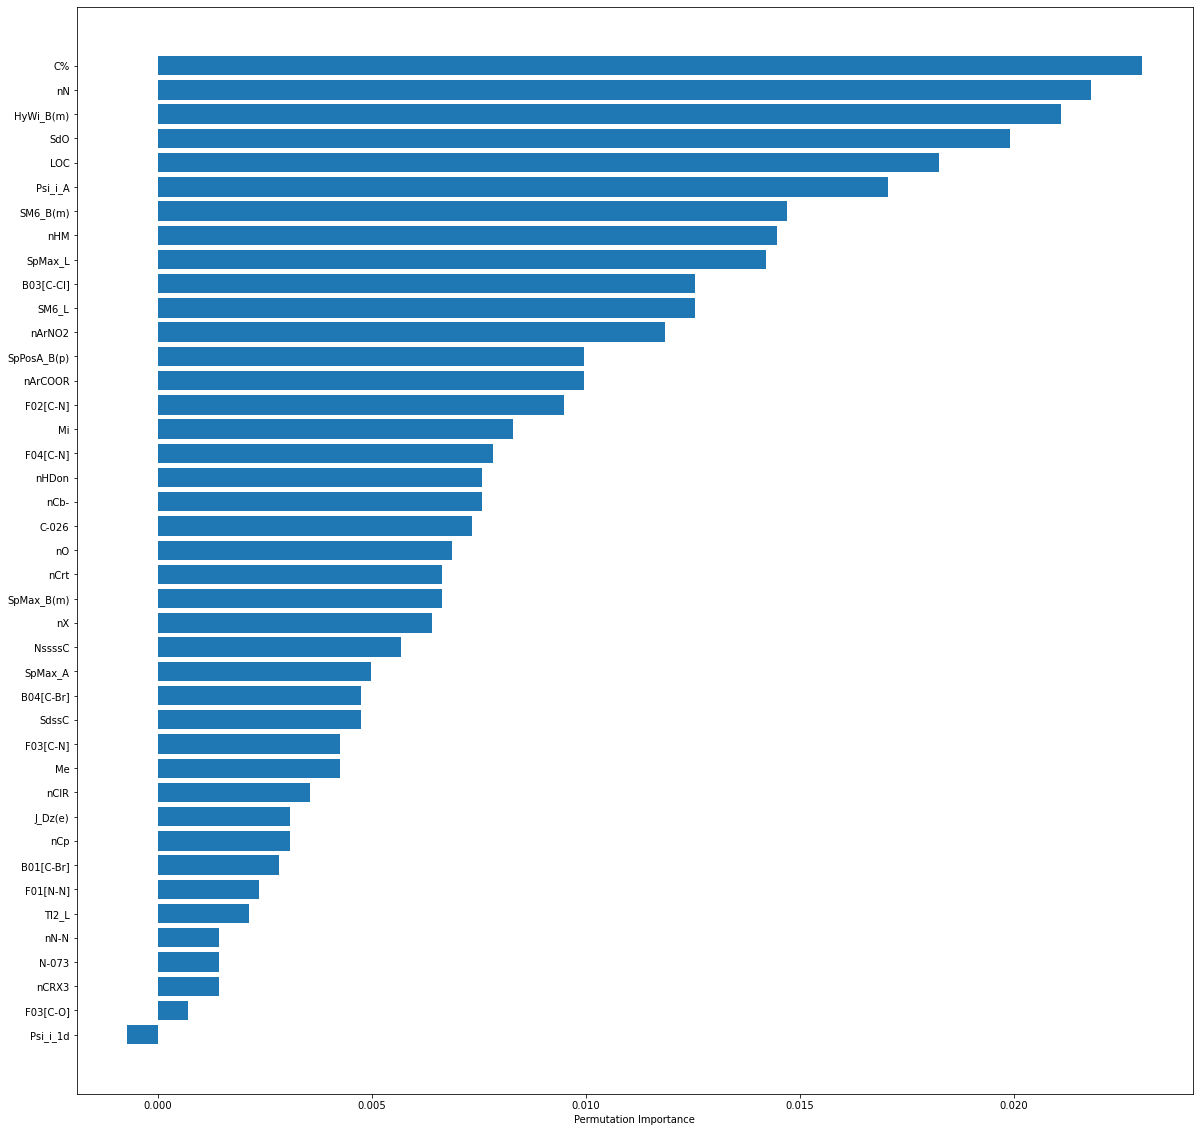

In [32]:
#Showing parameters importante by permutation

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(cl_svm, X_train_scale, y_train)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(20,20))
plt.barh(df.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()